In [231]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Datathon.csv", sep=",")
df.columns=["Transaccion","Comercio","Tipo Comercio","Especifico","Fecha","Pais","Forma Pago","Sexo","Estado","Edad","Monto","ID"]

# Separar la columna de fecha y hora

In [232]:


lista = df['Fecha'].str.split(" ")
fecha=[]
hora=[]
for i in range (len(lista)):
    fecha.append(lista[i][0])
    hora.append(lista[i][1])
Fecha=[]
for i in range(len(fecha)):
    Fecha.append(fecha[i].split("-"))
Hora = []
for i in range(len(hora)):
    Hora.append(hora[i].split(":"))


In [233]:
Fecha = pd.DataFrame(Fecha,columns=["Año","Mes","Dia"])
Hora = pd.DataFrame(Hora,columns=["Hora","Minuto","Segundo"])
Hora = pd.DataFrame(Hora,columns=["Hora","Minuto"])
Tiempo = np.concatenate((Fecha,Hora),axis=1)
Tiempo = pd.DataFrame(Tiempo,columns=["Año","Mes","Dia","Hora","Minuto" ]).astype(int)
Tiempo["Hora"].min()


0

# Crear una columna con el tiempo de forma ordinal


In [234]:
from datetime import date
from datetime import datetime
fechita = date(Tiempo['Año'][0],Tiempo['Mes'][0],Tiempo['Dia'][0])
fechita=[]
for i in range(len(Tiempo)):
    fechita.append(date(Tiempo['Año'][i],Tiempo['Mes'][i],Tiempo['Dia'][i]).toordinal())
    i+=1
id = df["ID"]
id = pd.DataFrame(id)
fechita= pd.DataFrame(fechita)
monto = pd.DataFrame(df["Monto"])


In [235]:
FechaCompra = np.concatenate((fechita,Hora,monto,id),axis=1)
FechaCompra=pd.DataFrame(FechaCompra,columns=['Fecha','Hora','Minuto','Monto',"ID"])
FechaCompra["Fecha"] -= 738467
week = []
for i in range(len(FechaCompra)):
    week.append(FechaCompra["Fecha"][i]//7)
week = pd.DataFrame(week)


,Week,Fecha,Hora,Minuto,Monto,ID
0,10,73,13,48,65.04,933
1,11,81,13,58,143.18,8562
2,11,82,13,37,84.8,3980
3,13,95,15,06,124.22,9389
4,11,77,12,50,17.44,1845
...,...,...,...,...,...,...
358355,9,66,14,36,531.91,463
358356,2,19,02,22,531.24,4167
358357,15,111,15,35,523.99,3264
358358,4,31,18,28,548.17,8180


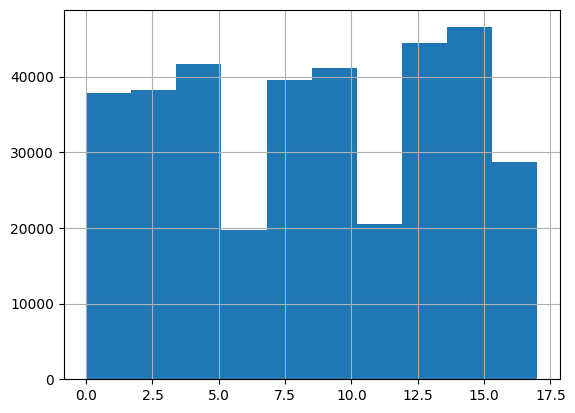

In [236]:
FechaCompra = np.concatenate((week,fechita,Hora,monto,id),axis=1)
FechaCompra=pd.DataFrame(FechaCompra,columns=['Week','Fecha','Hora','Minuto','Monto',"ID"])
FechaCompra["Fecha"] -=738467
Navidad = FechaCompra[FechaCompra["Fecha"] == 33].groupby("Fecha")["Monto"].sum()
gastosdias =FechaCompra.groupby("Fecha")["Monto"].sum().sort_values()
FechaCompra["Week"].hist()
FechaCompra

Week
16    4290688.57
14    4017582.17
5     3997356.15
12    3946698.02
6     3687592.04
1     3664265.44
7     3629691.13
15    3618699.49
9     3575700.39
8     3538228.18
3     3500761.22
13    3490017.98
4     3464492.78
11    3344520.67
10    3286879.91
2     2968320.88
0     2935527.57
17     542238.24
Name: Monto, dtype: object

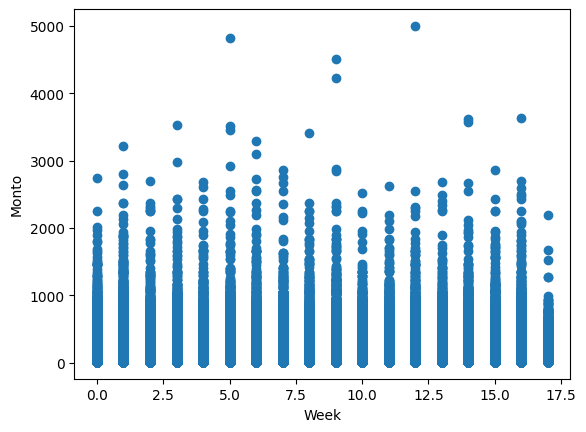

In [237]:
import matplotlib.pyplot as plt

plt.scatter(FechaCompra["Week"], FechaCompra["Monto"])
plt.xlabel("Week")
plt.ylabel("Monto")
gastossemana =FechaCompra.groupby("Week")["Monto"].sum().sort_values(ascending=False)
gastossemana

# Gasto semanal por ID

In [238]:
gastosdiaid =FechaCompra.groupby(["Fecha","ID"])["Monto"].sum()
gastosdiaid = pd.DataFrame(gastosdiaid)
gastosdiaid=gastosdiaid.reset_index()
gastosdiaid.loc[gastosdiaid["ID"]==1]

,Fecha,ID,Monto
22012,13,1,223.77
28355,17,1,111.45
40254,24,1,158.15
74880,43,1,20.18
85167,49,1,59.85


In [239]:
q1=5
dias_quincena=[q1,q1+15,q1+15*2,q1+15*3,q1+15*4,q1+15*5,q1+15*6,q1+15*7]
dias_quincena[0]


5

In [240]:

mask=(gastosdiaid["Fecha"]==dias_quincena[0]) | (gastosdiaid["Fecha"]==dias_quincena[1])| (gastosdiaid["Fecha"]==dias_quincena[2])| (gastosdiaid["Fecha"]==dias_quincena[3])| (gastosdiaid["Fecha"]==dias_quincena[4]) | (gastosdiaid["Fecha"]==dias_quincena[5])| (gastosdiaid["Fecha"]==dias_quincena[6])| (gastosdiaid["Fecha"]==dias_quincena[7])

quincenaID = gastosdiaid.loc[mask]
quincenaID["Monto"].std()

307.46225933001784

In [241]:
gastossemanaid =FechaCompra.groupby(["Week","ID"])["Monto"].sum()
gastossemanaid = pd.DataFrame(gastossemanaid)

In [242]:
gastossemanaid=gastossemanaid.reset_index()

promediosemanal=gastossemanaid.groupby(["ID"])["Monto"].mean()
promediosemanal = pd.DataFrame(promediosemanal,columns=["Monto"])
promediosemanal=promediosemanal.reset_index()
promediosemanal

,ID,Monto
0,1,114.680000
1,2,627.342000
2,3,610.346667
3,4,359.928571
4,5,1002.724167
...,...,...
9995,9996,676.600625
9996,9997,139.175000
9997,9998,495.320000
9998,9999,411.035000


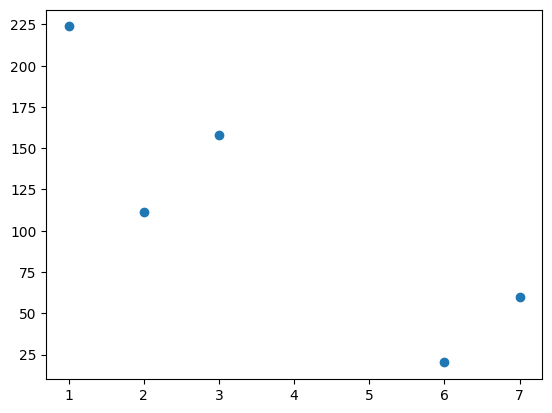

In [243]:
semanalID=gastossemanaid.loc[gastossemanaid["ID"]== 1]
semanalID2=gastossemanaid.loc[gastossemanaid["ID"]== 7]
plt.scatter(semanalID["Week"],semanalID["Monto"])

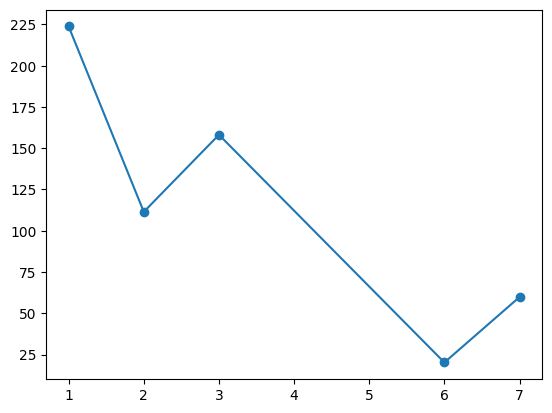

In [244]:
plt.plot(semanalID["Week"],semanalID["Monto"],'-o')

In [245]:
TDD = df[df["Transaccion"] == "TDD"].groupby("ID")["Transaccion"].count()
TDD = TDD.reindex(df["ID"].unique(), fill_value=0)
TDD = pd.DataFrame({"TDD":TDD})
TDD = TDD.sort_values("ID")
TDC = df[df["Transaccion"] == "TDC"].groupby("ID")["Transaccion"].count()
TDC = TDC.reindex(df["ID"].unique(), fill_value=0)
TDC = pd.DataFrame({"TDC":TDC})
TDC = TDC.sort_values("ID")
ID = df["ID"].sort_values().unique()
ID = pd.DataFrame(ID,columns=["ID"])
transaccion = df.groupby("ID")["Transaccion"].count()
transaccion = pd.DataFrame(transaccion,columns=["Transaccion"])
suma = df.groupby("ID")["Monto"].sum()
edad = df.groupby("ID")["Edad"].mean()
suma = pd.DataFrame(suma,columns=["Monto"])
edad = pd.DataFrame(edad,columns= ["Edad"])

In [246]:
agrupacion = np.concatenate((ID,suma,edad,transaccion,TDD,TDC),axis=1)
agrupacion = pd.DataFrame(agrupacion,columns=["ID","Monto","Edad","Total de Transacciones","TDD","TDC"])
agrupacion.Edad.value_counts(bins=[0,17,35,50,80,100,123]) #Cantidad de gente por edad
#agrupacion.loc[agrupacion["ID"]==8828]
agrupacion

,ID,Monto,Edad,Total de Transacciones,TDD,TDC
0,1.0,573.40,38.0,5.0,5.0,0.0
1,2.0,3136.71,28.0,12.0,12.0,0.0
2,3.0,1831.04,45.0,4.0,4.0,0.0
3,4.0,2519.50,51.0,10.0,10.0,0.0
4,5.0,12032.69,1.0,108.0,108.0,0.0
...,...,...,...,...,...,...
9995,9996.0,10825.61,24.0,63.0,3.0,60.0
9996,9997.0,278.35,48.0,3.0,3.0,0.0
9997,9998.0,495.32,23.0,3.0,0.0,3.0
9998,9999.0,1644.14,29.0,14.0,0.0,14.0


##CLUSTERS

<AxesSubplot: xlabel='Total de Transacciones', ylabel='Monto'>

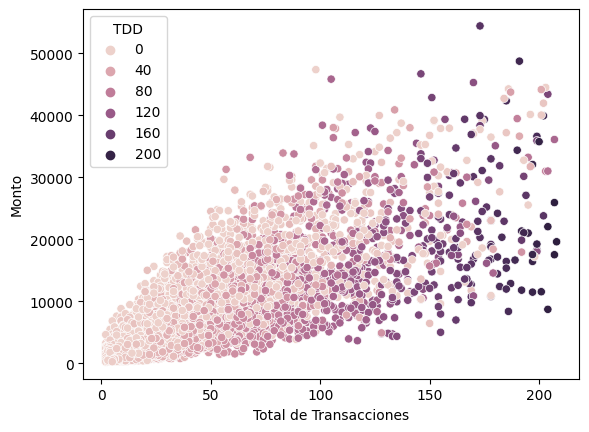

In [247]:
x = agrupacion[["Total de Transacciones","Monto"]]
y = agrupacion[["Edad"]]
sns.scatterplot(data=agrupacion,x="Total de Transacciones",y="Monto",hue="TDD")

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42) #80% de training y 20% de test, 42 es la semilla de aleatoreidad.

In [249]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [250]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<AxesSubplot: xlabel='Total de Transacciones', ylabel='Monto'>

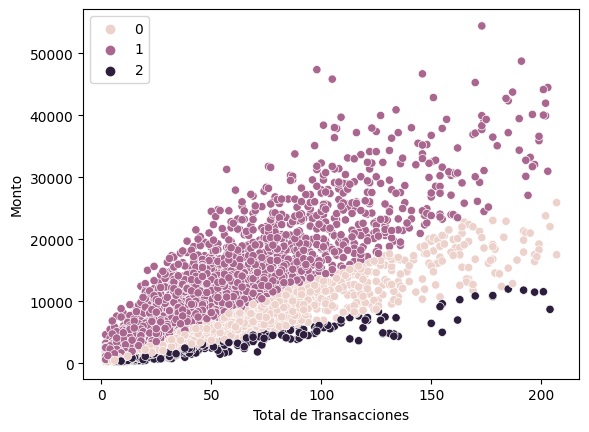

In [251]:
sns.scatterplot(data = X_train, x = "Total de Transacciones", y = "Monto", hue = kmeans.labels_)

In [252]:
k_prediction=kmeans.predict(X_test_norm)

In [253]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_test_norm,k_prediction)
print("El modelo tiene un silhouette score de:",silhouette*100,"%")

El modelo tiene un silhouette score de: 59.16346624732353 %


<AxesSubplot: xlabel='Total de Transacciones', ylabel='Monto'>

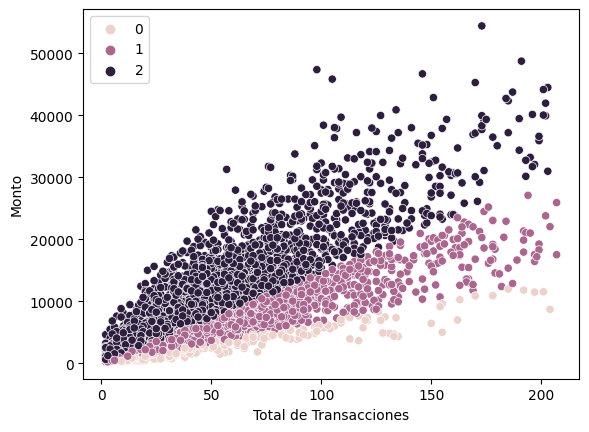

In [254]:
from sklearn.cluster import AgglomerativeClustering
Agg = AgglomerativeClustering(n_clusters=3)
Agg.fit(X_train_norm)
sns.scatterplot(data = X_train, x = "Total de Transacciones", y = "Monto", hue = Agg.labels_)

In [255]:
Agg_prediction=Agg.fit_predict(X_test_norm)

In [256]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_test_norm,Agg_prediction)
print("El modelo tiene un silhouette score de:",silhouette*100,"%")

El modelo tiene un silhouette score de: 53.08904008482062 %


In [257]:
import pandas as pd
inf2019_2022=1.03636*1.03397*1.05689*1.07896
arreglo = [['I',round(9807/3),round(10819/3)],['II',round(17324/3),round(15376/3)], ['III',round(23053/3),round(18641/3)],['IV',round(28714/3),round(21943/3)],['V',round(34762/3),round(25931/3)],['VI',round(41897/3),round(29458/3)],['VII',round(50844/3),round(34422/3)],['VIII',round(63348/3),round(40883/3)],['IX',round(84575/3),round(51835/3)],['X',round(179863/3),round(93980/3)]]
#print(arreglo)
for i in range(0, len(arreglo)):
    for j in range(0, len(arreglo[0])):
        if isinstance(arreglo[i][j],int):
            arreglo[i][j]*=inf2019_2022/2
            arreglo[i][j]=round(arreglo[i][j])
    #if isinstance(i2023, int):
     #   arreglo[i2023]=i2023*inf2019_2023
df_2= pd.DataFrame(arreglo, columns=['Decil', 'Ingresos','Gastos'])
df_2= df_2.reset_index(drop=True)

In [258]:
arreglo=[['I','0-2499','0-2999'],['II','2500-3999','3000-3499'],['III','4000-5399','3500-3999'],['IV','5400-6799','4000-4999'],['V','6800-8499','5000-5899'],['VI','8500-9999','5900-6599'],['VII','10000-11999','6600-7799'],['VIII','12000-16999','7800-9999'],['IX','17000-29999','10000-14999'],['X','+30000','+15000']]
df_3= pd.DataFrame(arreglo, columns=['Decil', 'Ingresos promedio','Gastos promedio'])

In [259]:
d_I = []
d_II = []
d_III = []
d_IV = []
d_V = []
d_VI = []
d_VII = []
d_VIII = []
d_IX = []
d_X = []
incorrecto = []
count = 1
for i in agrupacion['Monto']:
    if i >= 0 and i < 3000:
        d_I.append(count)
    elif i >= 3000 and i < 3500:
        d_II.append(count)
    elif i >= 3500 and i < 4000:
        d_III.append(count)
    elif i >= 4000 and i < 5000:
        d_IV.append(count)
    elif i >= 5000 and i < 5900:
        d_V.append(count)
    elif i >= 5900 and i < 6600:
        d_VI.append(count)
    elif i >= 6600 and i < 7800:
        d_VII.append(count)
    elif i >= 7800 and i < 10000:
        d_VIII.append(count)
    elif i >= 10000 and i < 15000:
        d_IX.append(count)
    elif i >= 15000:
        d_X.append(count)
    count += 1
arreglo=[len(d_I),len(d_II),len(d_III),len(d_IV),len(d_V),len(d_VI),len(d_VII),len(d_VIII),len(d_IX),len(d_X)]
print(len(incorrecto))
dframe = pd.DataFrame(arreglo, columns=['Cantidad de personas por decil (desde I - X) '])

0


In [260]:
suma=len(d_I)+len(d_II)+len(d_III)+len(d_IV)+len(d_V)+len(d_VI)+len(d_VII)+len(d_VIII)+len(d_IX)+len(d_X)
suma
percentage=[(len(d_I)/suma*100),(len(d_II)/suma*100),(len(d_III)/suma*100),(len(d_IV)/suma*100),(len(d_V)/suma*100),(len(d_VI)/suma*100),(len(d_VII)/suma*100),(len(d_VIII)/suma*100),(len(d_IX)/suma*100),(len(d_X)/suma*100),]
print(len(incorrecto))
dframe_3 = pd.DataFrame(percentage, columns=['Porcentaje de personas por decil (desde I - X) % '])

0


In [261]:
cont = 0
df = df.assign(Esencial=[0]*358360)
for i in df['ID']:
    if df['Tipo Comercio'][cont] == 'RETAIL':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'SUPERMERCADOS':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'AGREGADOR':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'OTROS':
        df['Esencial'][cont] =('0')
    elif df['Tipo Comercio'][cont] == 'TRANSPORTE TERRESTRE DE PASAJEROS':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'GASOLINERAS':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'RESTAURANTE':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'COMIDA RAPIDA':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'MISCELANEAS':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'ENTRETENIMIENTO':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'FARMACIAS':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'TELECOMUNICACIONES':
        df['Esencial'][cont] =('1')   
    elif df['Tipo Comercio'][cont] == 'GOBIERNO':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'REFACCIONES Y FERRETERIA':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'MEDICOS Y DENTISTAS':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'HOTELES':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'COLEGIOS Y UNIVERSIDADES':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'TRANSPORTE AEREO':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'ASEGURADORAS':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'SALONES DE BELLEZA':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'BENEFICENCIA':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'ESTACIONAMIENTOS':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'PEAJE':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'EDUCACIN BASICA':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'AGENCIAS DE VIAJES':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'HOSPITALES':
        df['Esencial'][cont] =('1')
    elif df['Tipo Comercio'][cont] == 'RENTA DE AUTOS':
        df['Esencial'][cont] =('-1')
    elif df['Tipo Comercio'][cont] == 'GUARDERIAS':
        df['Esencial'][cont] =('-1')
    cont += 1

C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_15436\3058882557.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Esencial'][cont] =('1')


In [262]:
caracteristicas=12
ID_clients=[0]*10000
#Primera característica

#ID_clients
for i in range (1,len(ID_clients)+1):
    for j in d_I:
        if j==i:
            ID_clients[i-1]=10
    for j in d_II:
        if j==i:
            ID_clients[i-1]=20
    for j in d_III:
        if j==i:
            ID_clients[i-1]=30
    for j in d_IV:
        if j==i:
            ID_clients[i-1]=40
    for j in d_V:
        if j==i:
            ID_clients[i-1]=50   
    for j in d_VI:
        if j==i:
            ID_clients[i-1]=60
    for j in d_VII:
        if j==i:
            ID_clients[i-1]=70
    for j in d_VIII:
        if j==i:
            ID_clients[i-1]=80
    for j in d_IX:
        if j==i:
            ID_clients[i-1]=90
    for j in d_X:
        if j==i:
            ID_clients[i-1]=100

In [263]:
for j in range(len(ID_clients)):
    #Segunda característica
    if df['Tipo Comercio'][j]== 'ASEGURADORAS':
        ID_clients[j]+=100
max(ID_clients)

200

In [264]:
ne_clients=[0]*10000
for i in range (len(df)):
    z=df['Esencial'][i]
    #print(z)
    if z=='-1':
        x=df['Monto'][i]
        y=df['ID'][i]
        ne_clients[y-1]+=x
ne_clients

for i in range (10000):
    if ne_clients[i]<=(0.375*agrupacion['Monto'][i]):
        ID_clients[i]+=100

score = pd.DataFrame(ID_clients)
agrupacion = np.concatenate((agrupacion,score),axis=1)
agrupacion = pd.DataFrame(agrupacion,columns=["ID","Monto","Edad","Total de Transacciones","TDD","TDC","Score"])
agrupacion.max()

ID                        10000.00
Monto                     54417.49
Edad                        123.00
Total de Transacciones      208.00
TDD                         208.00
TDC                         202.00
Score                       300.00
dtype: float64

In [265]:
for i in range(len(agrupacion)):
    if promediosemanal["Monto"][i] <= agrupacion["Monto"][i]/4:
        agrupacion["Score"][i]+=100
    i+=1
agrupacion["Monto"] =agrupacion["Monto"]*4
agrupacion["Score"] =agrupacion["Score"]/4

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42) #80% de training y 20% de test, 42 es la semilla de aleatoreidad.

In [267]:
# Genera la matriz de instancias y el vector de salidas (hint: numpy array)

#Separar los datos crudos en una matriz para atributos y un vector para la clasificación
X=np.array(agrupacion[["Monto","Edad","Total de Transacciones","TDD","TDC"]]) #*65 con depth 10
Y=np.array(agrupacion[["Score"]])
Y=Y.astype("int")
exis=X
#Aplicar normalizacion MinMax
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [304]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13, algorithm="brute") #k=3
knn.fit(X_train,Y_train.ravel())
Y_pred =knn.predict(X_test) #Esto va a resultar en una h(xtest) predictora

In [305]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test,Y_pred,average='micro')
print("EL modelo tiene una precision del {0}% ".format(precision*100))

EL modelo tiene una precision del 38.45% 
